<a href="https://colab.research.google.com/github/rashmi-biswas/ML_Regression_Sales_Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pylab import *



In [49]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from sklearn.model_selection import GridSearchCV
from IPython.display import Image 
from sklearn.svm import SVR
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.decomposition import PCA


# Modelling Helpers
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
stores_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/CS Project 2: Sup. ML Regression/Rossmann Stores Data.csv')
stores = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/CS Project 2: Sup. ML Regression/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 1. Stores_data

In [52]:
print('Shape of stores_data :', stores_data.shape)

Shape of stores_data : (1017209, 9)


In [53]:
stores_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [54]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [55]:
stores_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [56]:
stores_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [57]:
stores_data['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [58]:
print('Open :\n', stores_data['Open'].value_counts(), '\n\n')
print('Promo :\n', stores_data['Promo'].value_counts(), '\n\n')
print('StateHoliday :\n', stores_data['StateHoliday'].value_counts(), '\n\n')
print('SchoolHoliday :\n', stores_data['SchoolHoliday'].value_counts(), '\n\n')

Open :
 1    844392
0    172817
Name: Open, dtype: int64 


Promo :
 0    629129
1    388080
Name: Promo, dtype: int64 


StateHoliday :
 0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64 


SchoolHoliday :
 0    835488
1    181721
Name: SchoolHoliday, dtype: int64 




We can see that there is something odd in StateHoliday data

In [59]:
stores_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [60]:
stores_data['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [61]:
stores_data['StateHoliday'] = stores_data['StateHoliday'].apply(lambda x: 0 if x == '0' else x)
stores_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [62]:
stores_data['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [63]:
df1 = stores_data.groupby(['StateHoliday','Open'])

In [64]:
df1['Open'].value_counts().to_frame()

Open
StateHoliday Open Open        
0            0    0     142677
             1    1     843482
a            0    0      19566
             1    1        694
b            0    0       6545
             1    1        145
c            0    0       4029
             1    1         71

In [65]:
df2 = df1['Open','Sales'].sum()
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Open       Sales
StateHoliday Open                    
0            0          0           0
             1     843482  5865164768
a            0          0           0
             1        694     5890305
b            0          0           0
             1        145     1433744
c            0          0           0
             1         71      691806

In [66]:

df3 = df2[df2['Open'] !=0]
df3

,,Open,Sales
StateHoliday,Open,,
0,1,843482,5865164768
a,1,694,5890305
b,1,145,1433744
c,1,71,691806


In [67]:

t1 = df3['Sales'].sum()
t2 = stores_data['Sales'].sum()
print(t1 ,',', t2)

5873180623 , 5873180623


In [68]:
total = df3['Sales'].sum()
sales_a = ((5890305)/total)*100
sales_b = ((1433744)/total)*100
sales_c = ((691806)/total)*100
print(sales_a , sales_b, sales_c)


0.10029156905089788 0.024411713039869845 0.011779069032728436


### We can see that even though the sale on state-holiday type b is almost double of the sale on state-holiday type c, and the sale on state-holiday type a is almost 4 times the sale on state-holiday type b, but **There is no significant difference in the percentage of sales of state holiday type a, b and c as compared to themselves and to total sales.** So, we can treat different types of stateholidays in same way. Thus we can **replace state holiday type a, b & c by 1** only.


The feature StateHoliday changed into a boolean variable. The value {a, b, c} became 1, other 0;

In [69]:
stores_data['StateHoliday'].replace({'0':0,
                                     'a':1,
                                     'b':1,
                                     'c':1}, inplace = True)

In [70]:
stores_data['StateHoliday'].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [71]:
stores_data['StateHoliday'].unique()

array([0, 1])

In [72]:

# dealing with date time

stores_data['Date'] = pd.to_datetime(stores_data['Date'])
stores_data['Year'] = stores_data['Date'].dt.year
stores_data['Month'] = stores_data['Date'].dt.month
stores_data['Day'] = stores_data['Date'].dt.day
stores_data['Week'] = stores_data['Date'].dt.week%4
stores_data['WeekOfYear'] = stores_data['Date'].dt.week
stores_data['Quarter'] = stores_data['Date'].dt.quarter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [73]:
stores_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,Quarter
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31,3
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31,3
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31,3
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31,3
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31,3


### 2. Stores

In [74]:
print('Shape of Stores:' , stores.shape)

Shape of Stores: (1115, 10)


In [75]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [76]:
stores.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [77]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Distance from nearest competitor is never equal to 0 with min 20, max is 75860 

In [78]:
stores['CompetitionDistance'].isnull().value_counts()

False    1112
True        3
Name: CompetitionDistance, dtype: int64

In [79]:
stores[stores['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [80]:
stores['CompetitionDistance'].fillna(stores['CompetitionDistance'].mean(), inplace = True)

In [81]:
stores.iloc[290]

Store                                291
StoreType                              d
Assortment                             a
CompetitionDistance          5404.901079
CompetitionOpenSinceMonth            NaN
CompetitionOpenSinceYear             NaN
Promo2                                 0
Promo2SinceWeek                      NaN
Promo2SinceYear                      NaN
PromoInterval                        NaN
Name: 290, dtype: object

Min of 1990 in CompetitionOpenSinceYear seems error

In [82]:
stores['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [83]:
stores['CompetitionOpenSinceYear'].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

Since the data seems to be in between 1990 to 2013, 1900 and 1961 looks like error or suspicious values.

In [84]:
stores['CompetitionOpenSinceYear'].replace(1900, int(stores['CompetitionOpenSinceYear'].mode()), inplace = True)
stores['CompetitionOpenSinceYear'].replace(1961, int(stores['CompetitionOpenSinceYear'].mode()), inplace = True)

In [85]:
stores['CompetitionOpenSinceYear'].value_counts()

2013.0    85
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2011.0    54
2008.0    54
2009.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

### Filing NA Values

In [86]:
stores['CompetitionOpenSinceMonth'].fillna(0, inplace = True)
stores['CompetitionOpenSinceYear'].fillna(0, inplace = True)
stores['Promo2SinceWeek'].fillna(0, inplace = True)
stores['Promo2SinceYear'].fillna(0, inplace = True)
stores['PromoInterval'].fillna(0, inplace = True)

In [87]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Basic EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


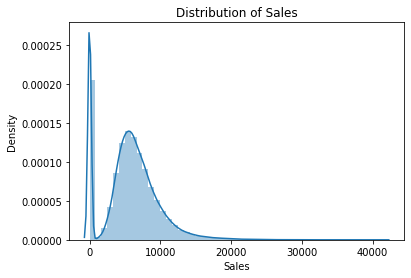

In [88]:
# Sales Distribution

plt.title("Distribution of Sales")
sns.distplot(stores_data['Sales'])
plt.show()

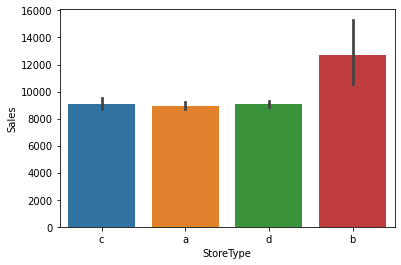

In [89]:
sns.barplot(x = stores['StoreType'], y = stores_data['Sales'])
plt.show()

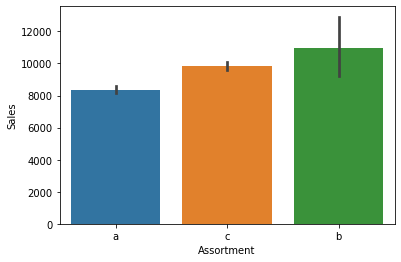

In [90]:
sns.barplot(x = stores['Assortment'], y = stores_data['Sales'])
plt.show()

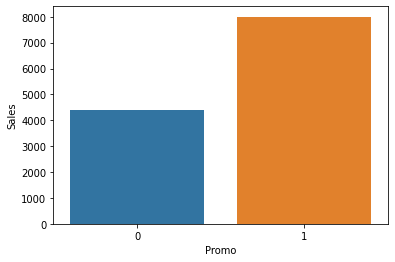

In [91]:
sns.barplot(x = stores_data['Promo'], y = stores_data['Sales'])
plt.show()

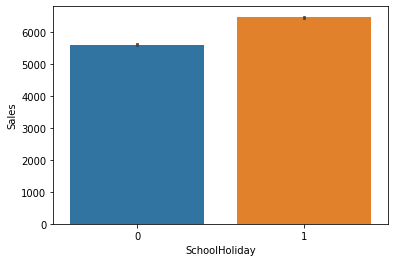

In [92]:
sns.barplot(x = stores_data['SchoolHoliday'], y = stores_data['Sales'])
plt.show()

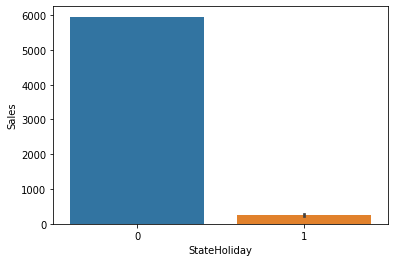

In [93]:
sns.barplot(x = stores_data['StateHoliday'], y = stores_data['Sales'])
plt.show()

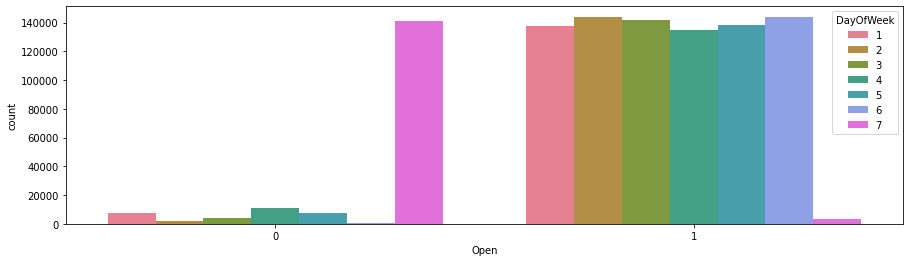

In [102]:
fig, (axis1) = plt.subplots(1,1,figsize = (15,4))
sns.countplot(x = 'Open', hue = 'DayOfWeek', data=stores_data, palette= 'husl')

This clearly shows that most shops remain closed on Sundays. Some stores were also closed on weekdays, this may be due to public holidays, as stores are usually closed on public holidays and open during school vacations.



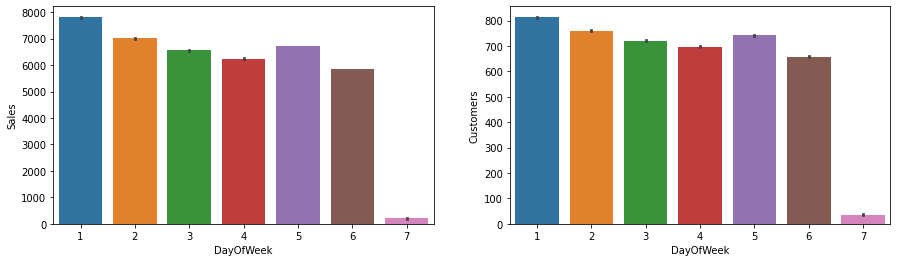

In [106]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))

sns.barplot(x = 'DayOfWeek', y = 'Sales', data = stores_data, ax = axis1)
sns.barplot(x = 'DayOfWeek', y = 'Customers', data = stores_data, ax = axis2)

This clearly shows that sales are high on the start of weekdays and less on end of week. Sales is very less on Sunday as maximum shops are closed.

### Promo Vs Sales

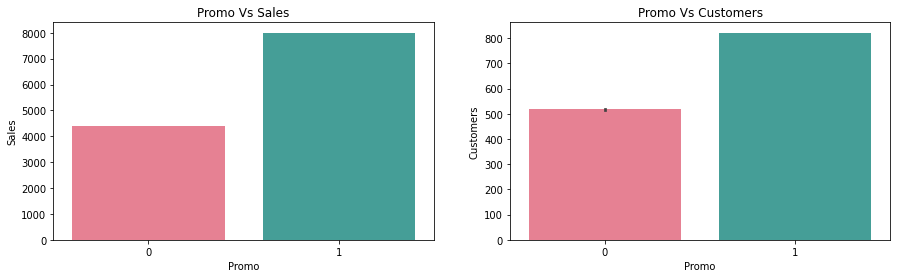

In [121]:
fig,(axis1,axis2) = plt.subplots(1,2,figsize = (15,4))

axis1.title.set_text('Promo Vs Sales')
axis2.title.set_text('Promo Vs Customers')
sns.barplot(x = 'Promo', y = 'Sales', data = stores_data, ax = axis1, palette= 'husl')
sns.barplot(x = 'Promo',y = 'Customers', data = stores_data, ax = axis2, palette= 'husl')

Here we observe that sales and customers increase significantly during promotions. This shows that the promotion has a positive effect for a store.

### Holiday Vs Sales

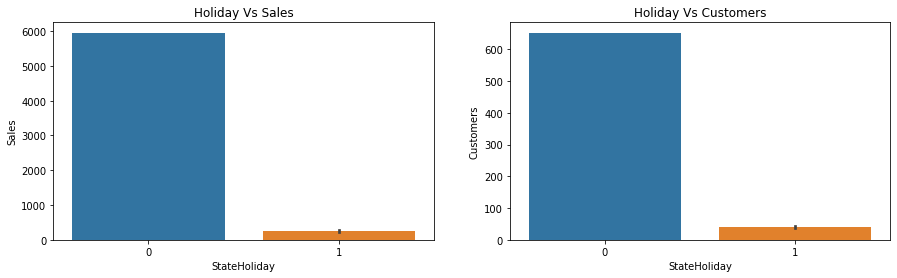

In [127]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,4))

axis1.title.set_text('Holiday Vs Sales')
axis2.title.set_text('Holiday Vs Customers')
sns.barplot(x='StateHoliday', y='Sales', data=stores_data, ax=axis1)
sns.barplot(x='StateHoliday', y='Customers', data=stores_data,ax=axis2)

Here we observe that sales and customers decreases significantly during holidays. This shows that the holiday has a negative effect for a store.

### Sales per Year

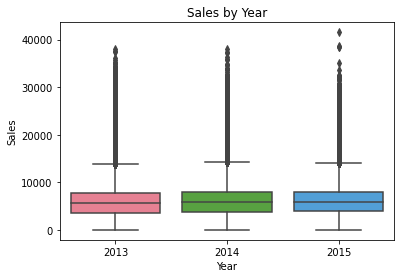

In [132]:
plt.title('Sales by Year')
sns.boxplot(x= 'Year', y= 'Sales', data=stores_data, palette= 'husl')
plt.show()

### Sales Per Month

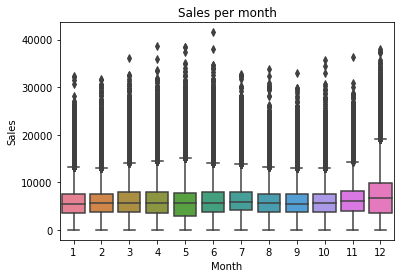

In [135]:
plt.title('Sales per month')
sns.boxplot(x= 'Month', y= 'Sales', data= stores_data, palette= 'husl')
plt.show()

### EDA Findings:
The best-selling and most frequented type of store is A.

Sales are strongly correlated to the number of customers.

For all stores, promotion leads to increased sales and customers.

Stores open during school holidays have more sales than on normal days.

Each time a store participates in a promotion, it is done for 5 days and twice a month for each store.

More stores are open during school holidays than on public holidays.

Sales increase during Christmas week, this may be due to people buying more beauty products during a Christmas party.

The absence of values ​​in the CompetitionOpenSinceYear/Month entities does not indicate the absence of competition because the CompetitionDistance values ​​are not null where the other two values ​​are null.

After analyzing sales using Fourier decomposition, I discovered that there is a component of seasonality in sales data